<a href="https://colab.research.google.com/github/knock0knock/Projects/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [ ]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv(r'Loveelectric.csv')

data

,Submitted Date,Signed Date,Cancelled Date,Latest Stock ETA,Stock ETA History,Delivery Date,Manufacturer,Car,CAP ID,P11D Value at Order,Salary,Age of Driver,Annual Mileage,Term Months,Funder,Net monthly cost,Orders
0,17-09-2021,30-09-2021,NaN,02-12-2021,NaN,02-12-2021,TESLA,MODEL 3 SALOON,89233,48435.00,70000,37,15000,36,Lex Autolease,522.97,1
1,17-09-2021,30-09-2021,NaN,02-12-2021,NaN,02-12-2021,TESLA,MODEL 3 SALOON,89233,48435.00,71500,32,10000,36,Lex Autolease,552.79,1
2,09-10-2021,30-10-2021,NaN,NaN,NaN,09-12-2021,AUDI,E-TRON ESTATE,98232,83665.00,170000,52,10000,48,Lex Autolease,657.41,1
3,17-10-2021,08-12-2021,NaN,24-12-2021,NaN,24-12-2021,AUDI,E-TRON ESTATE,93098,80470.00,93000,47,15000,48,Lex Autolease,737.51,1
4,29-10-2021,08-12-2021,NaN,24-01-2022,NaN,24-01-2022,KIA,E-NIRO ELECTRIC ESTATE,93910,39640.00,55000,53,25000,36,Lex Autolease,440.61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,29-06-2023,29-06-2023,NaN,30-06-2023,NaN,NaN,MG MOTOR UK,MG4 HATCHBACK,101150,32985.00,29512,40,15000,48,Lex Autolease,452.07,0
1373,29-06-2023,30-06-2023,NaN,14-08-2023,NaN,NaN,TESLA,MODEL Y HATCHBACK,99337,59935.01,206000,44,8000,36,Arnold Clark,717.82,0
1374,29-06-2023,30-06-2023,05-07-2023,17-07-2023,NaN,NaN,POLESTAR,2 FASTBACK,101999,56895.00,115000,52,25000,48,Lex Autolease,425.49,0
1375,29-06-2023,04-07-2023,NaN,21-08-2023,NaN,NaN,KIA,NIRO EV ESTATE,100391,39490.01,75000,36,10000,48,Lex Autolease,423.72,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

np.set_printoptions(suppress=True)


# Select relevant columns as features and target
features = ['P11D Value at Order', 'Salary', 'Age of Driver', 'Annual Mileage', 'Term Months', 'Net monthly cost']
target = 'Orders'  # You need to have a 'Car Orders' column in your dataset

# Drop rows with missing values
data = data.dropna(subset=[target] + features)

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Fit a linear regression model
X_train = train_data[features]
y_train = train_data[target]

# Adding a constant to the features for statsmodels
X_train = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()

# Print summary of the model
print(model.summary())

# Now you can use the trained model for prediction and evaluation
X_test = test_data[features]
y_test = test_data[target]

# Adding a constant to the test features for scikit-learn
X_test = sm.add_constant(X_test)

# Predict using the scikit-learn model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate the model (e.g., calculate RMSE, MAE, R-squared)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


                            OLS Regression Results                            
Dep. Variable:                 Orders   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.200
Date:                Sat, 02 Sep 2023   Prob (F-statistic):            0.00405
Time:                        21:37:09   Log-Likelihood:                -783.27
No. Observations:                1101   AIC:                             1581.
Df Residuals:                    1094   BIC:                             1616.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7057    

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


# Select relevant columns as features and target
features = ['P11D Value at Order', 'Salary', 'Age of Driver', 'Annual Mileage', 'Term Months', 'Net monthly cost']
target = 'Orders'

# Drop rows with missing values
data = data.dropna(subset=[target] + features)

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Fit a linear regression model with statsmodels
X_train = train_data[features]
y_train = train_data[target]
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

# Extract the coefficients
coefficients = model.params

#calculate elasticities
elasticities = {}
for feature in features:
    elasticity = coefficients[feature] * (X_train[feature].mean() / y_train.mean())
    elasticities[feature] = elasticity

# Print the elasticities
print("Elasticities of Demand:")
for feature, elasticity in elasticities.items():
    print(f"{feature}: {elasticity:.4f}")

# Rest of your code for scikit-learn model and evaluation


Elasticities of Demand:
P11D Value at Order: -0.1955
Salary: 0.0324
Age of Driver: 0.0582
Annual Mileage: 0.1836
Term Months: -0.1906
Net monthly cost: -0.1639


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression



# Select relevant columns as features and target
features = ['P11D Value at Order', 'Salary', 'Age of Driver', 'Annual Mileage', 'Term Months']
target = 'Orders'

# Drop rows with missing values
data = data.dropna(subset=[target] + features)

# Fit a linear regression model
X = data[features]
y = data[target]

lr = LinearRegression()
lr.fit(X, y)

# Generate features for the next 365 days (adjust as needed)
next_365_days = pd.date_range(start=data['Submitted Date'].max(), periods=365, freq='D')
next_features = pd.DataFrame({
    'P11D Value at Order': np.mean(X['P11D Value at Order']),  # Replace with appropriate values
    'Salary': np.mean(X['Salary']),  # Replace with appropriate values
    'Age of Driver': np.mean(X['Age of Driver']),  # Replace with appropriate values
    'Annual Mileage': np.mean(X['Annual Mileage']),  # Replace with appropriate values
    'Term Months': np.mean(X['Term Months'])  # Replace with appropriate values
}, index=next_365_days)

# Make predictions for the next 365 days
predicted_orders = lr.predict(next_features)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Date': next_365_days,
    'Predicted Orders': predicted_orders
})

# Save predictions to a CSV file (optional)
predictions_df.to_csv('predictions_next_365_days.csv', index=False)

# Print or visualize the predictions as needed
print(predictions_df)


          Date  Predicted Orders
0   2022-10-31           0.54902
1   2022-11-01           0.54902
2   2022-11-02           0.54902
3   2022-11-03           0.54902
4   2022-11-04           0.54902
..         ...               ...
360 2023-10-26           0.54902
361 2023-10-27           0.54902
362 2023-10-28           0.54902
363 2023-10-29           0.54902
364 2023-10-30           0.54902

[365 rows x 2 columns]


<ipython-input-15-ebc8931a5086>:22: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  next_365_days = pd.date_range(start=data['Submitted Date'].max(), periods=365, freq='D')


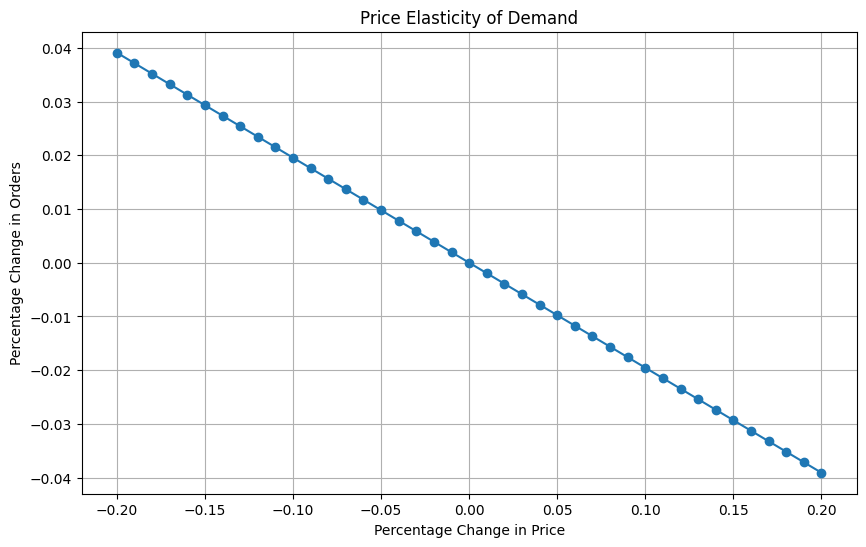

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load your data into the 'data' DataFrame

# Select relevant columns as features and target
features = ['P11D Value at Order', 'Salary', 'Age of Driver', 'Annual Mileage', 'Term Months', 'Net monthly cost']
target = 'Orders'

# Drop rows with missing values
data = data.dropna(subset=[target] + features)

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Fit a linear regression model with statsmodels
X_train = train_data[features]
y_train = train_data[target]
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

# Extract the coefficients
coefficients = model.params

# Create a range of price changes
price_changes = np.linspace(-0.2, 0.2, 41)  # A range of price changes from -20% to +20%

# Calculate the price elasticities for each price change
elasticities = []
for price_change in price_changes:
    orders_change = coefficients['P11D Value at Order'] * price_change * (X_train['P11D Value at Order'].mean() / y_train.mean())
    elasticities.append(orders_change)

# Plot the price elasticity of demand
plt.figure(figsize=(10, 6))
plt.plot(price_changes, elasticities, marker='o')
plt.title('Price Elasticity of Demand')
plt.xlabel('Percentage Change in Price')
plt.ylabel('Percentage Change in Orders')
plt.grid(True)
plt.show()


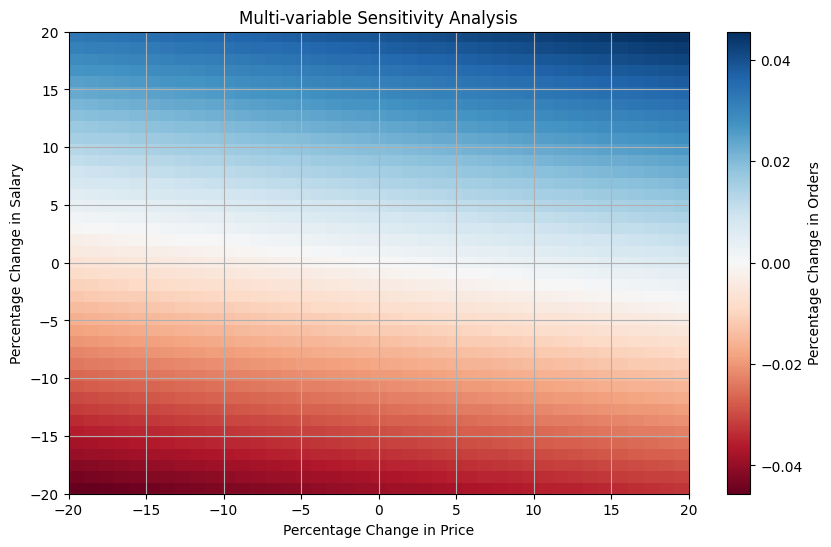

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load your data into the 'data' DataFrame

# Select relevant columns as features and target
features = ['P11D Value at Order', 'Salary', 'Age of Driver', 'Annual Mileage', 'Term Months', 'Net monthly cost']
target = 'Orders'

# Drop rows with missing values
data = data.dropna(subset=[target] + features)

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Fit a linear regression model with statsmodels
X_train = train_data[features]
y_train = train_data[target]
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

# Extract the coefficients
coefficients = model.params

# Define the elasticities
PED_P11D = -2.5
Elasticity_Salary = 1.8

# Create a range of price changes
price_changes = np.linspace(-0.2, 0.2, 41)  # A range of price changes from -20% to +20% in 1% increments

# Create a range of salary changes
salary_changes = np.linspace(-0.2, 0.2, 41)  # A range of salary changes from -20% to +20% in 1% increments

# Initialize an array to store results
results = np.zeros((len(price_changes), len(salary_changes)))

# Calculate the change in orders for each combination of price and salary changes
for i, price_change in enumerate(price_changes):
    for j, salary_change in enumerate(salary_changes):
        orders_change = (
            coefficients['P11D Value at Order'] * price_change * (X_train['P11D Value at Order'].mean() / y_train.mean()) +
            coefficients['Salary'] * salary_change * (X_train['Salary'].mean() / y_train.mean())
        )
        results[i, j] = orders_change

# Create a heatmap to visualize the results
plt.figure(figsize=(10, 6))
plt.imshow(results, extent=[-20, 20, -20, 20], cmap='RdBu', aspect='auto')
plt.colorbar(label='Percentage Change in Orders')
plt.title('Multi-variable Sensitivity Analysis')
plt.xlabel('Percentage Change in Price')
plt.ylabel('Percentage Change in Salary')
plt.grid(True)
plt.show()


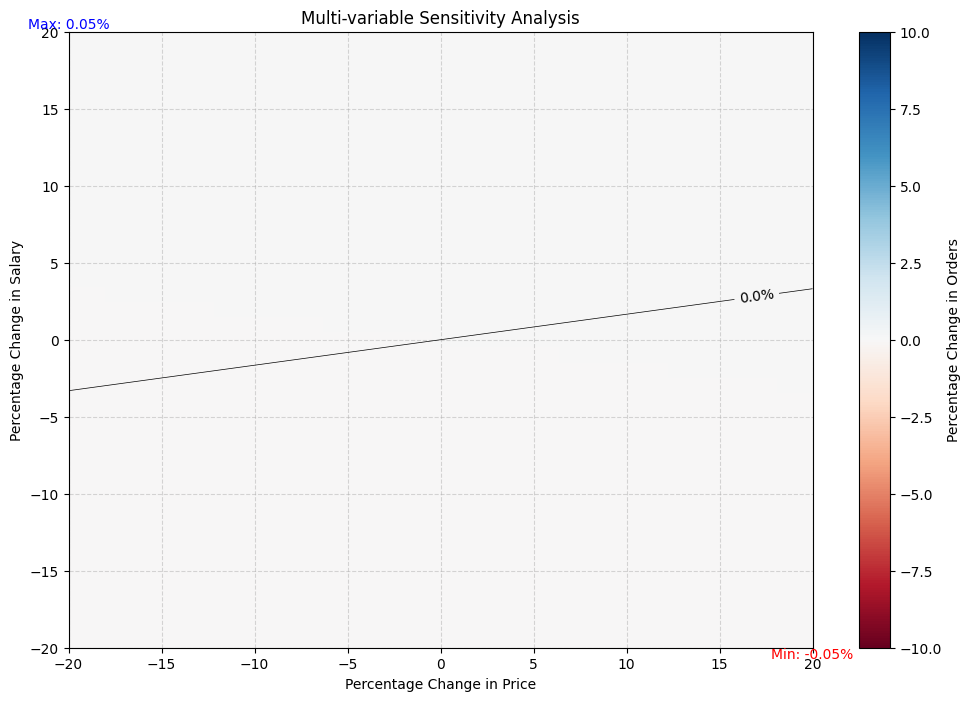

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load your data into the 'data' DataFrame

# Select relevant columns as features and target
features = ['P11D Value at Order', 'Salary', 'Age of Driver', 'Annual Mileage', 'Term Months', 'Net monthly cost']
target = 'Orders'

# Drop rows with missing values
data = data.dropna(subset=[target] + features)

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Fit a linear regression model with statsmodels
X_train = train_data[features]
y_train = train_data[target]
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

# Extract the coefficients
coefficients = model.params

# Define the elasticities
PED_P11D = -2.5
Elasticity_Salary = 1.8

# Create a range of price changes
price_changes = np.linspace(-0.2, 0.2, 41)  # A range of price changes from -20% to +20% in 1% increments

# Create a range of salary changes
salary_changes = np.linspace(-0.2, 0.2, 41)  # A range of salary changes from -20% to +20% in 1% increments

# Initialize an array to store results
results = np.zeros((len(price_changes), len(salary_changes)))

# Calculate the change in orders for each combination of price and salary changes
for i, price_change in enumerate(price_changes):
    for j, salary_change in enumerate(salary_changes):
        orders_change = (
            coefficients['P11D Value at Order'] * price_change * (X_train['P11D Value at Order'].mean() / y_train.mean()) +
            coefficients['Salary'] * salary_change * (X_train['Salary'].mean() / y_train.mean())
        )
        results[i, j] = orders_change

# Create a heatmap to visualize the results
plt.figure(figsize=(12, 8))
plt.imshow(results, extent=[-20, 20, -20, 20], cmap='RdBu', aspect='auto', vmin=-10, vmax=10)
plt.colorbar(label='Percentage Change in Orders')
plt.title('Multi-variable Sensitivity Analysis')
plt.xlabel('Percentage Change in Price')
plt.ylabel('Percentage Change in Salary')

# Add contour lines for reference
contour = plt.contour(price_changes * 100, salary_changes * 100, results, levels=[-5, -2.5, 0, 2.5, 5], colors='k', linewidths=0.5)
plt.clabel(contour, fmt='%1.1f%%', inline=True, fontsize=10)

# Annotate maximum and minimum points
max_val = np.max(results)
min_val = np.min(results)
max_indices = np.where(results == max_val)
min_indices = np.where(results == min_val)
plt.annotate(f'Max: {max_val:.2f}%', (price_changes[max_indices[0][0]] * 100, salary_changes[max_indices[1][0]] * 100),
             fontsize=10, color='blue', ha='center', va='bottom')
plt.annotate(f'Min: {min_val:.2f}%', (price_changes[min_indices[0][0]] * 100, salary_changes[min_indices[1][0]] * 100),
             fontsize=10, color='red', ha='center', va='top')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Critical Threshold Values:
[]


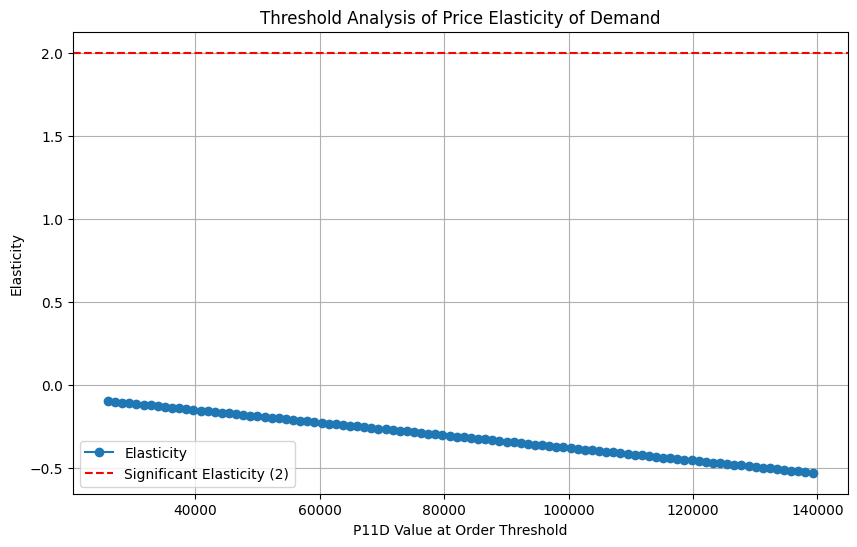

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load your data into the 'data' DataFrame
# Fit a linear regression model with statsmodels as shown in your previous code

# Define the range of thresholds (e.g., from the minimum to maximum observed 'P11D Value at Order')
thresholds = np.linspace(data['P11D Value at Order'].min(), data['P11D Value at Order'].max(), 100)

# Calculate and store the elasticities for each threshold
elasticities = []
for threshold in thresholds:
    elasticity = coefficients['P11D Value at Order'] * (threshold / X_train['P11D Value at Order'].mean()) * (X_train['P11D Value at Order'].mean() / y_train.mean())
    elasticities.append(elasticity)

# Define the threshold for significant elasticity magnitude (e.g., 2)
significant_threshold = 2

# Identify critical threshold values with significant elasticities
critical_thresholds = [thresholds[i] for i, elasticity in enumerate(elasticities) if abs(elasticity) >= significant_threshold]

# Plot the threshold analysis results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, elasticities, label='Elasticity', marker='o')
plt.axhline(y=significant_threshold, color='r', linestyle='--', label=f'Significant Elasticity ({significant_threshold})')
plt.title('Threshold Analysis of Price Elasticity of Demand')
plt.xlabel('P11D Value at Order Threshold')
plt.ylabel('Elasticity')
plt.legend()
plt.grid(True)

# Display the critical threshold values
print("Critical Threshold Values:")
print(critical_thresholds)
